# Packages & Data

In [ ]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

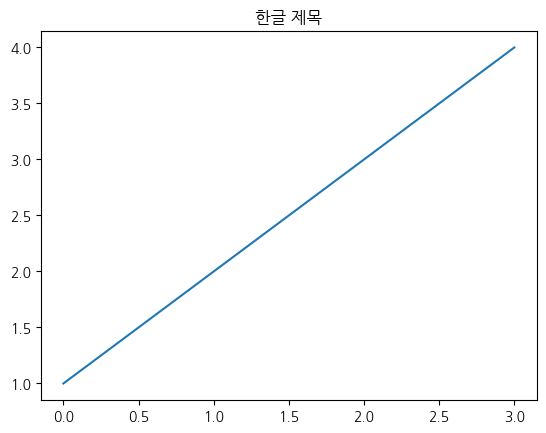

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [138]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.distributions.empirical_distribution import ECDF

from statsmodels.tsa.seasonal import seasonal_decompose # 계절 분석
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [139]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [140]:
!ls

1.premium.csv  2.train.csv				5.Market_Basket_Optimisation.csv
2.store.csv    3.WA_Fn-UseC_-HR-Employee-Attrition.csv	6.amz_data.csv
2.test.csv     4.Train.csv				7.uci-secom.csv


In [168]:
# Data
train = pd.read_csv("2.train.csv",
                    parse_dates = True, low_memory = False, index_col = 'Date')

store = pd.read_csv("2.store.csv",
                    low_memory = False)

train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [169]:
# 원본 데이터 복사
df = train.copy()

In [170]:
print("데이터 형태 : ", train.shape)
train.head(5)

데이터 형태 :  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [216]:
print("데이터 형태 : ", store.shape)
store.head()

데이터 형태 :  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


훈련 데이터
- Id - 테스트 세트 내에서 (상점, 날짜) 쌍을 나타내는 식별자

- 상점 - 각 상점의 고유 식별자

- 매출 - 주어진 날의 매출액 (이것이 예측하려는 값입니다)

- 고객수 - 주어진 날의 고객 수

- 영업 - 상점이 영업 중인지 여부를 나타내는 지표: 0 = 휴점, 1 = 영업

- 공휴일 - 주 공휴일을 나타냅니다. 일반적으로 대부분의 상점은 소수의 예외를 제외하고 주 공휴일에는 휴점합니다. 공립학교는 공휴일과 주말에 문을 닫는다는 점을 참고하세요. a = 공휴일, b = 부활절, c = 크리스마스, 0 = 없음

- 학교휴일 - 공립학교의 휴교가 (상점, 날짜)에 영향을 미쳤는지를 나타냅니다

- 상점유형 - 4가지 상점 모델을 구분합니다: a, b, c, d

- 상품구성 - 상품 구성 수준을 나타냅니다: a = 기본, b = 추가, c = 확장

- 경쟁상점까지 거리 - 가장 가까운 경쟁 상점까지의 거리(미터 단위)

- 경쟁상점 오픈 시기[월/년] - 가장 가까운 경쟁 상점이 오픈한 대략적인 연도와 월을 제공합니다

- 프로모션 - 해당 일에 상점에서 프로모션이 진행 중인지를 나타냅니다

- 프로모션2 - 프로모션2는 일부 상점들을 위한 지속적이고 연속적인 프로모션입니다: 0 = 상점이 참여하지 않음, 1 = 상점이 참여함

- 프로모션2 시작 시기[년/주] - 상점이 프로모션2에 참여하기 시작한 연도와 달력 주를 설명합니다

- 프로모션 간격 - 프로모션2가 시작되는 연속적인 간격을 설명하며, 프로모션이 새롭게 시작되는 달을 명명합니다. 예를 들어, "2월,5월,8월,11월"은 해당 상점이 주어진 해의 2월, 5월, 8월, 11월에 각 라운드가 시작됨을 의미합니다.

In [171]:
# 새로운 컬럼 생성
train['SalePerCustomer'] = train['Sales']/train['Customers'] # 객단가
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

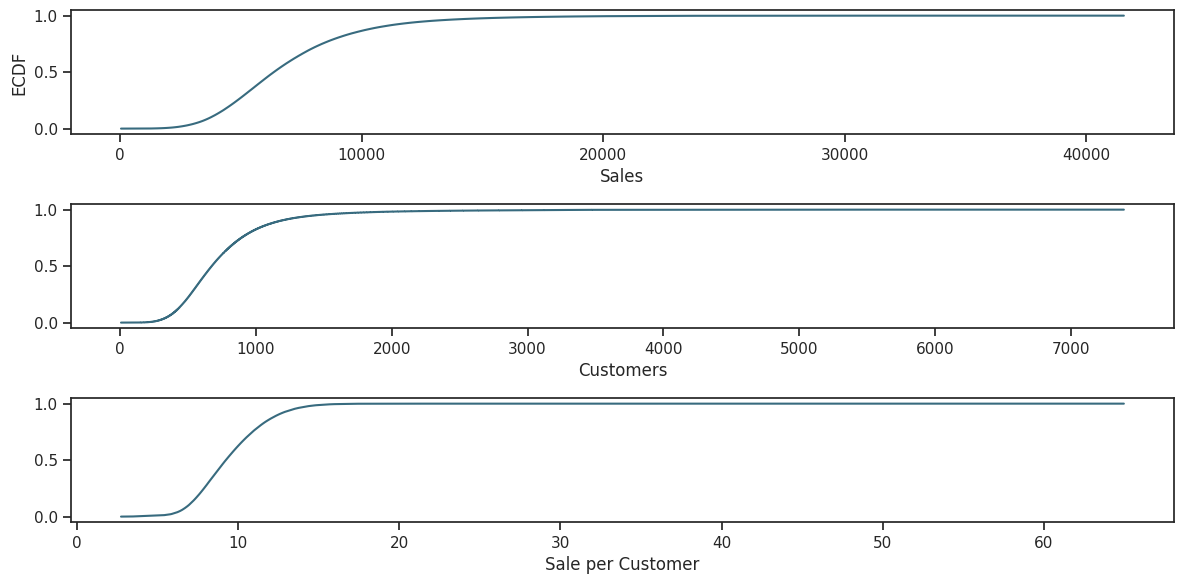

In [212]:
# 누적 분포 그래프
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');


plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');
plt.tight_layout()
plt.show()

1. Sales: 첫 번째 플롯은 'Sales' 데이터의 ECDF를 보여줍니다. 이 그래프는 대부분의 매출이 상대적으로 낮은 값에 집중되어 있음을 나타냅니다. 매출의 중앙값이 낮은 편이며, 매우 높은 매출 값을 기록한 경우는 드물다는 것을 볼 수 있습니다. 약 50% 이상의 데이터 포인트가 10,000 이하의 매출을 가지고 있음을 알 수 있습니다.

2. Customers: 두 번째 플롯은 'Customers' 데이터의 ECDF를 보여줍니다. 이 플롯은 고객 수가 대체로 낮은 범위에 집중되어 있으나, 'Sales' 데이터에 비해 약간 더 균일하게 분포되어 있음을 나타냅니다. 또한, 고객 수는 매출에 비해 상한 값이 상대적으로 낮아 보입니다.

3. Sale per Customer: 세 번째 플롯은 'Sale per Customer' 즉, 고객 당 매출을 나타내는 데이터의 ECDF를 보여줍니다. 이 데이터는 고객 한 명 당 생성되는 매출이 대부분 10 이하이며, 고객 당 매출이 20을 초과하는 경우는 상대적으로 드물다는 것을 보여줍니다.

이 ECDF 플롯들은 각 변수의 분포와 중심 경향성, 이상치의 존재 유무 등 데이터의 전반적인 형태를 파악하는 데 유용합니다. 예를 들어, 매출과 고객 수 모두에서, 대부분의 값들이 낮은 범위에 집중되어 있으며, 매우 높은 값들은 이들 데이터셋에서 이상치로 간주될 수 있음을 암시합니다.

In [173]:
# 오픈도 하지 않고 매출액도 없는 데이터 필터링
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
Date,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,NaN
2015-07-31,876,5,0,0,0,1,0,1,NaN
2015-07-30,292,4,0,0,0,1,0,1,NaN
2015-07-30,876,4,0,0,0,1,0,1,NaN
2015-07-29,292,3,0,0,0,1,0,1,NaN


In [174]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("데이터 형태 : ", zero_sales.shape)
zero_sales.head(5)

데이터 형태 :  (54, 9)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
Date,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,NaN
2015-03-26,674,4,0,0,1,0,0,0,NaN
2015-02-05,699,4,0,0,1,1,0,0,NaN
2014-10-01,708,3,0,0,1,1,0,0,NaN
2014-09-22,357,1,0,0,1,0,0,0,NaN


In [175]:
# 폐업을 한 상점 제외
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("데이터 형태 : ", train.shape)

데이터 형태 :  (844338, 9)


In [217]:
store.shape

(1115, 10)

In [177]:
# 결측값
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [178]:
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


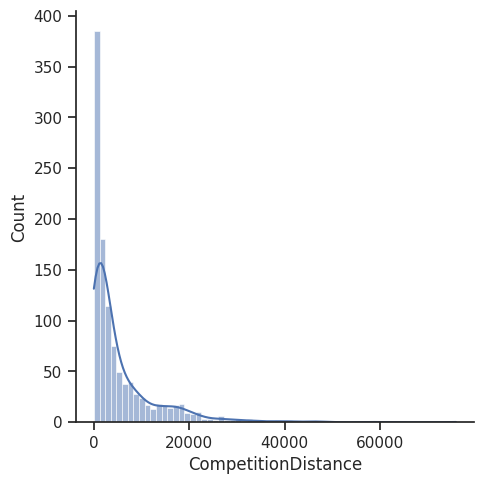

In [179]:
sns.displot(store['CompetitionDistance'],kde=True);

In [180]:
# 최빈값으로 결측치 대체
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [182]:
# 나머지 결측값 결측치 0으로 대체
store.fillna(0, inplace = True)

In [183]:
# Date Processing
train.reset_index(inplace = True)
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.weekofyear
train.drop(columns = 'Date', inplace = True)
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,Year,Month,Day,WeekOfYear
0,1,5,5263,555,1,1,0,1,9.482883,2015,7,31,31
1,2,5,6064,625,1,1,0,1,9.702400,2015,7,31,31
2,3,5,8314,821,1,1,0,1,10.126675,2015,7,31,31
3,4,5,13995,1498,1,1,0,1,9.342457,2015,7,31,31
4,5,5,4822,559,1,1,0,1,8.626118,2015,7,31,31


In [184]:
# 데이터 병합
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("데이터 형태 : ", train_store.shape)
train_store.head()

데이터 형태 :  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,9.482883,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,9.194139,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,9.143403,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,8.948214,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,9.970588,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


# EDA

In [185]:
# 가게 유형 별
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [186]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


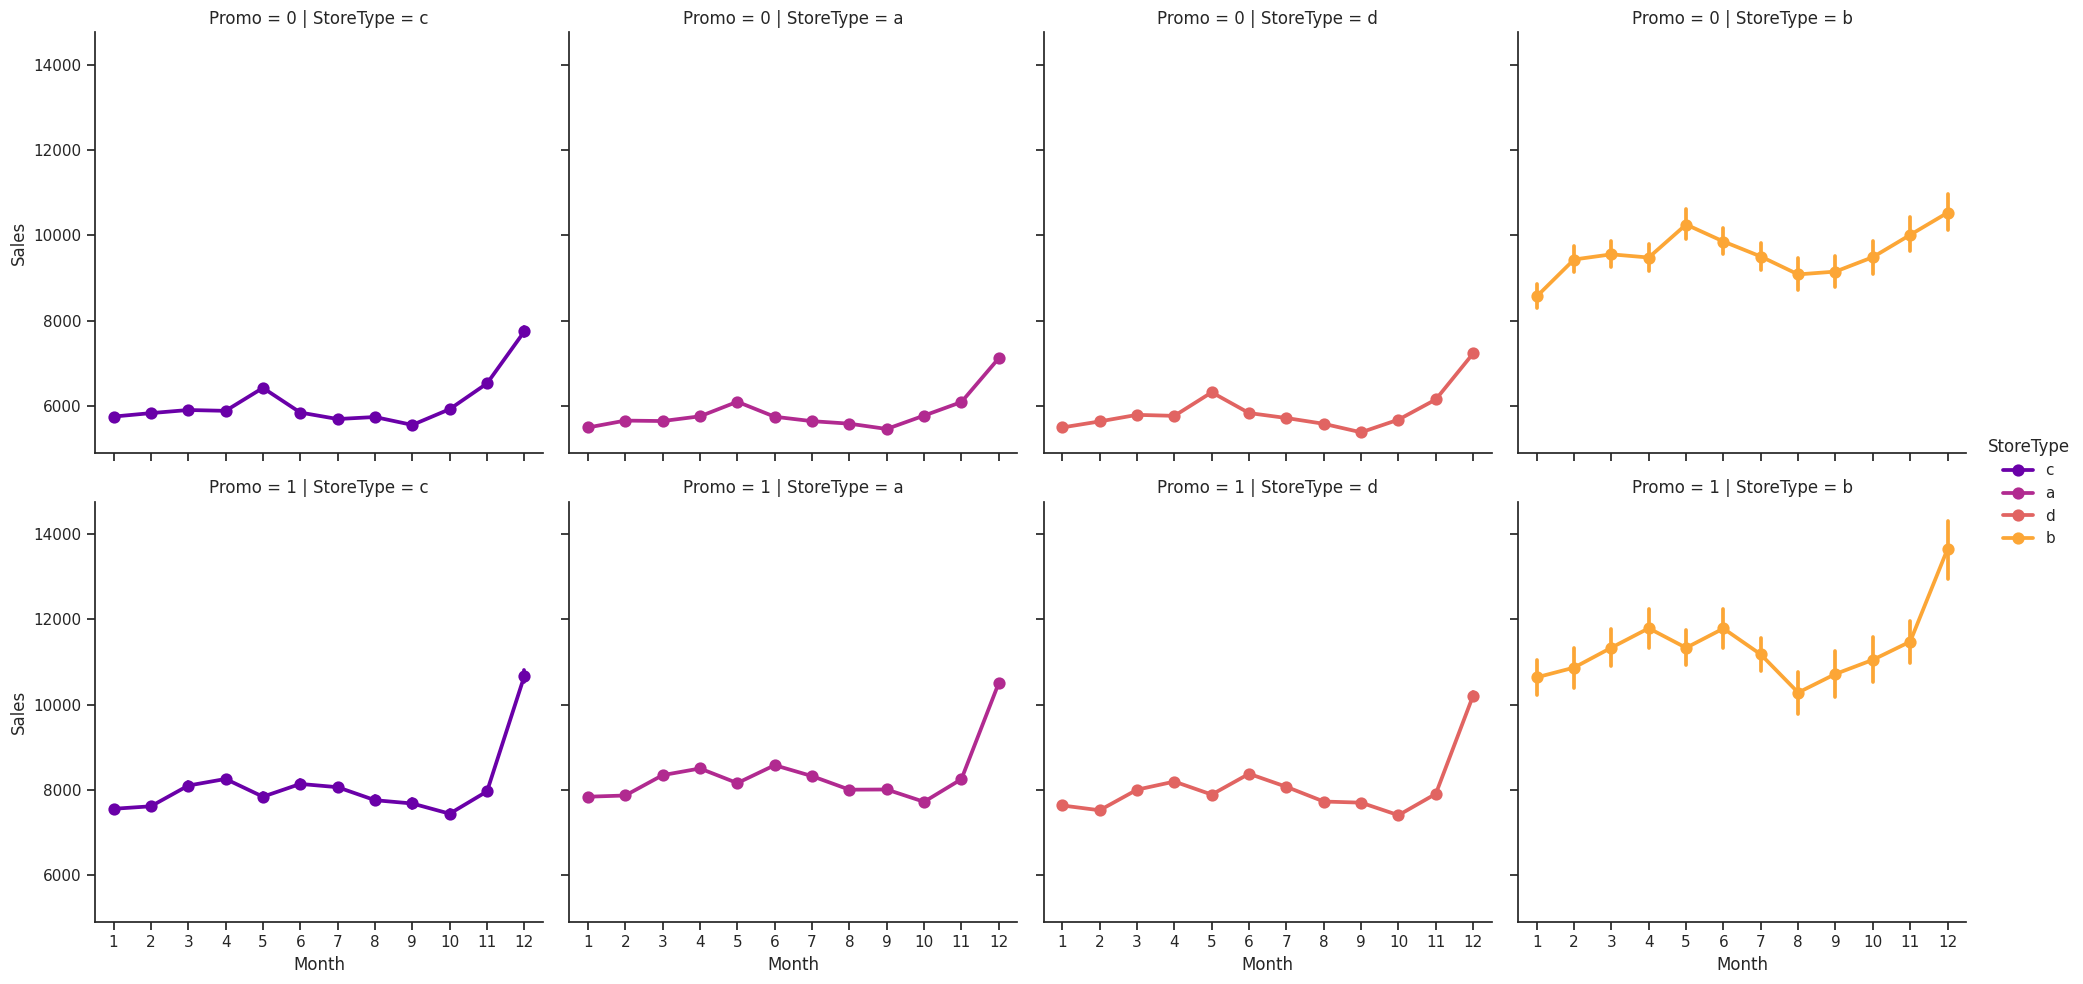

In [187]:
# 가게 유형별 매출액 월별 추이
sns.catplot(data=train_store, x='Month', y="Sales",
            col='StoreType',
            palette='plasma',
            hue='StoreType',
            row='Promo',
            kind='point');  # 또는 kind='bar' 등 원하는 차트 종류

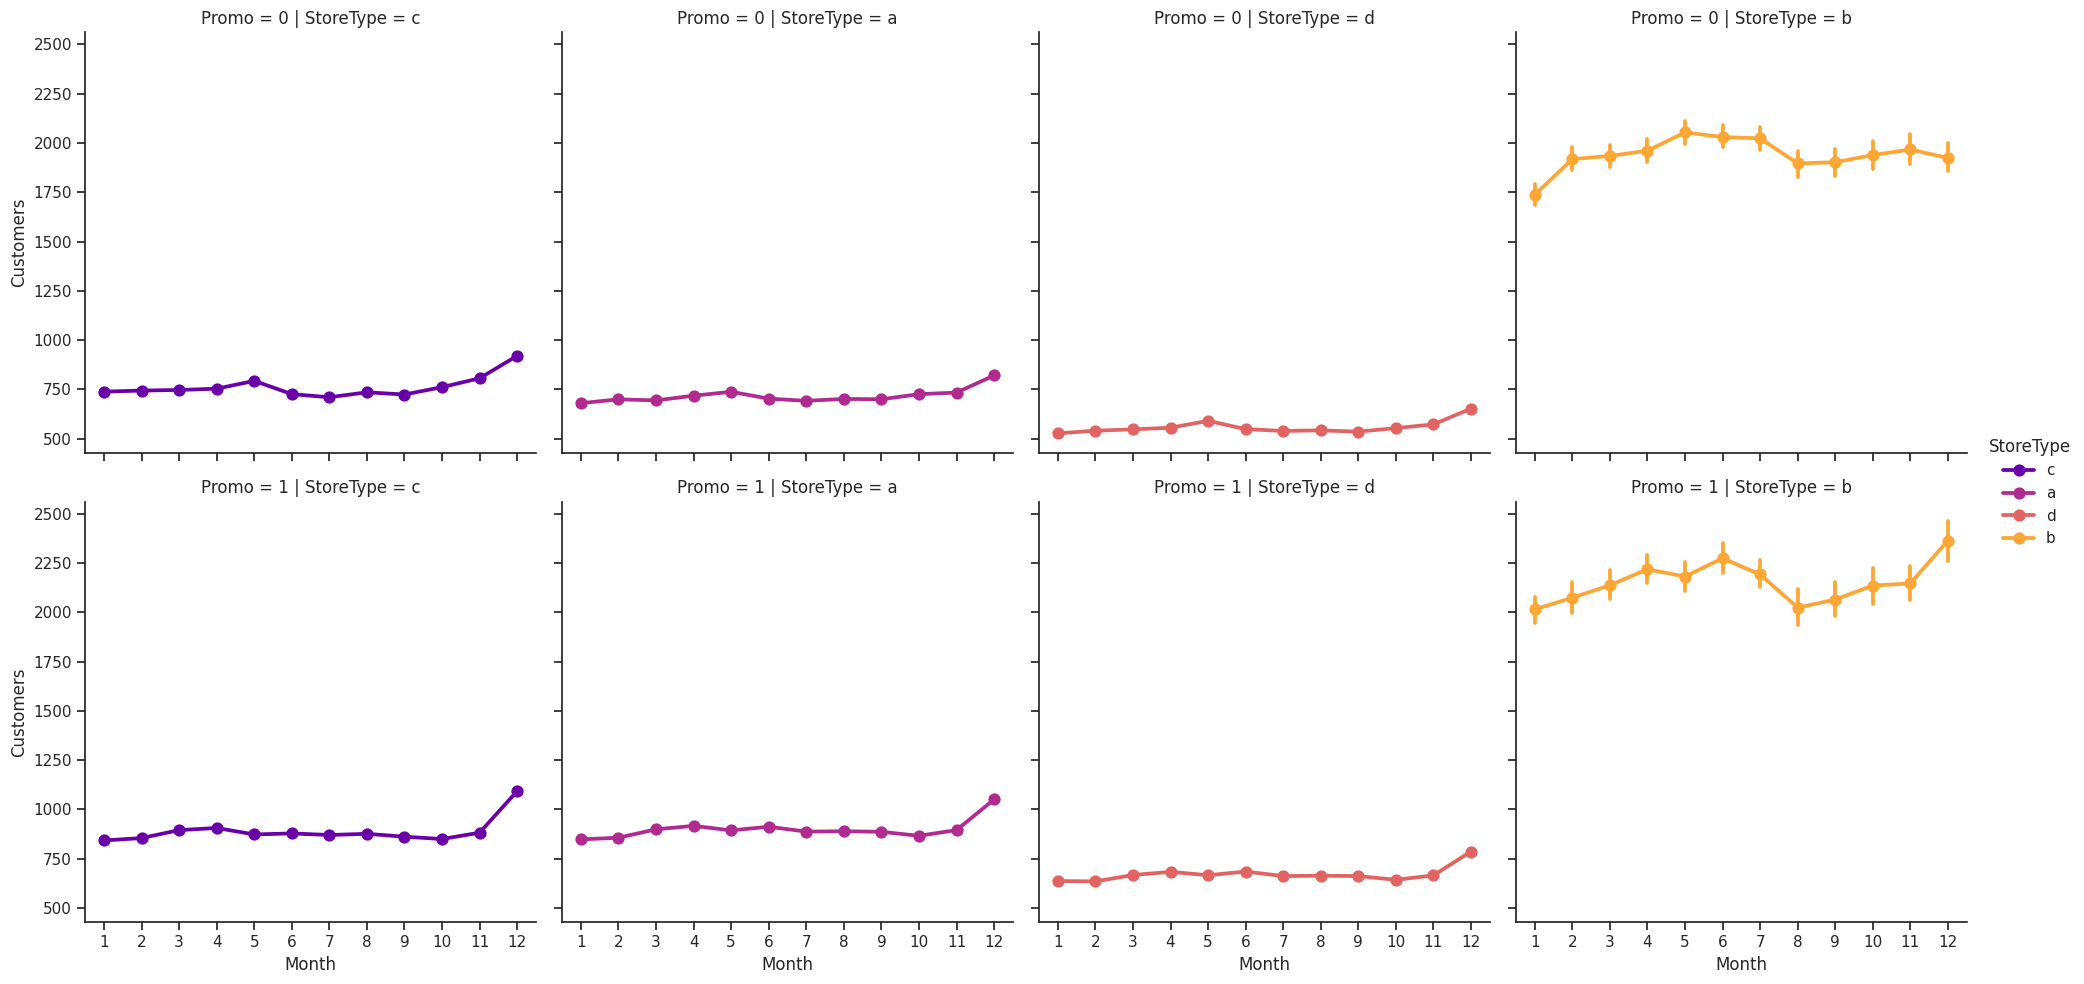

In [188]:
# 가게 유형별 고객 수 월별 추이
sns.catplot(data = train_store, x = 'Month', y = "Customers",
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               kind='point',
               color = c);

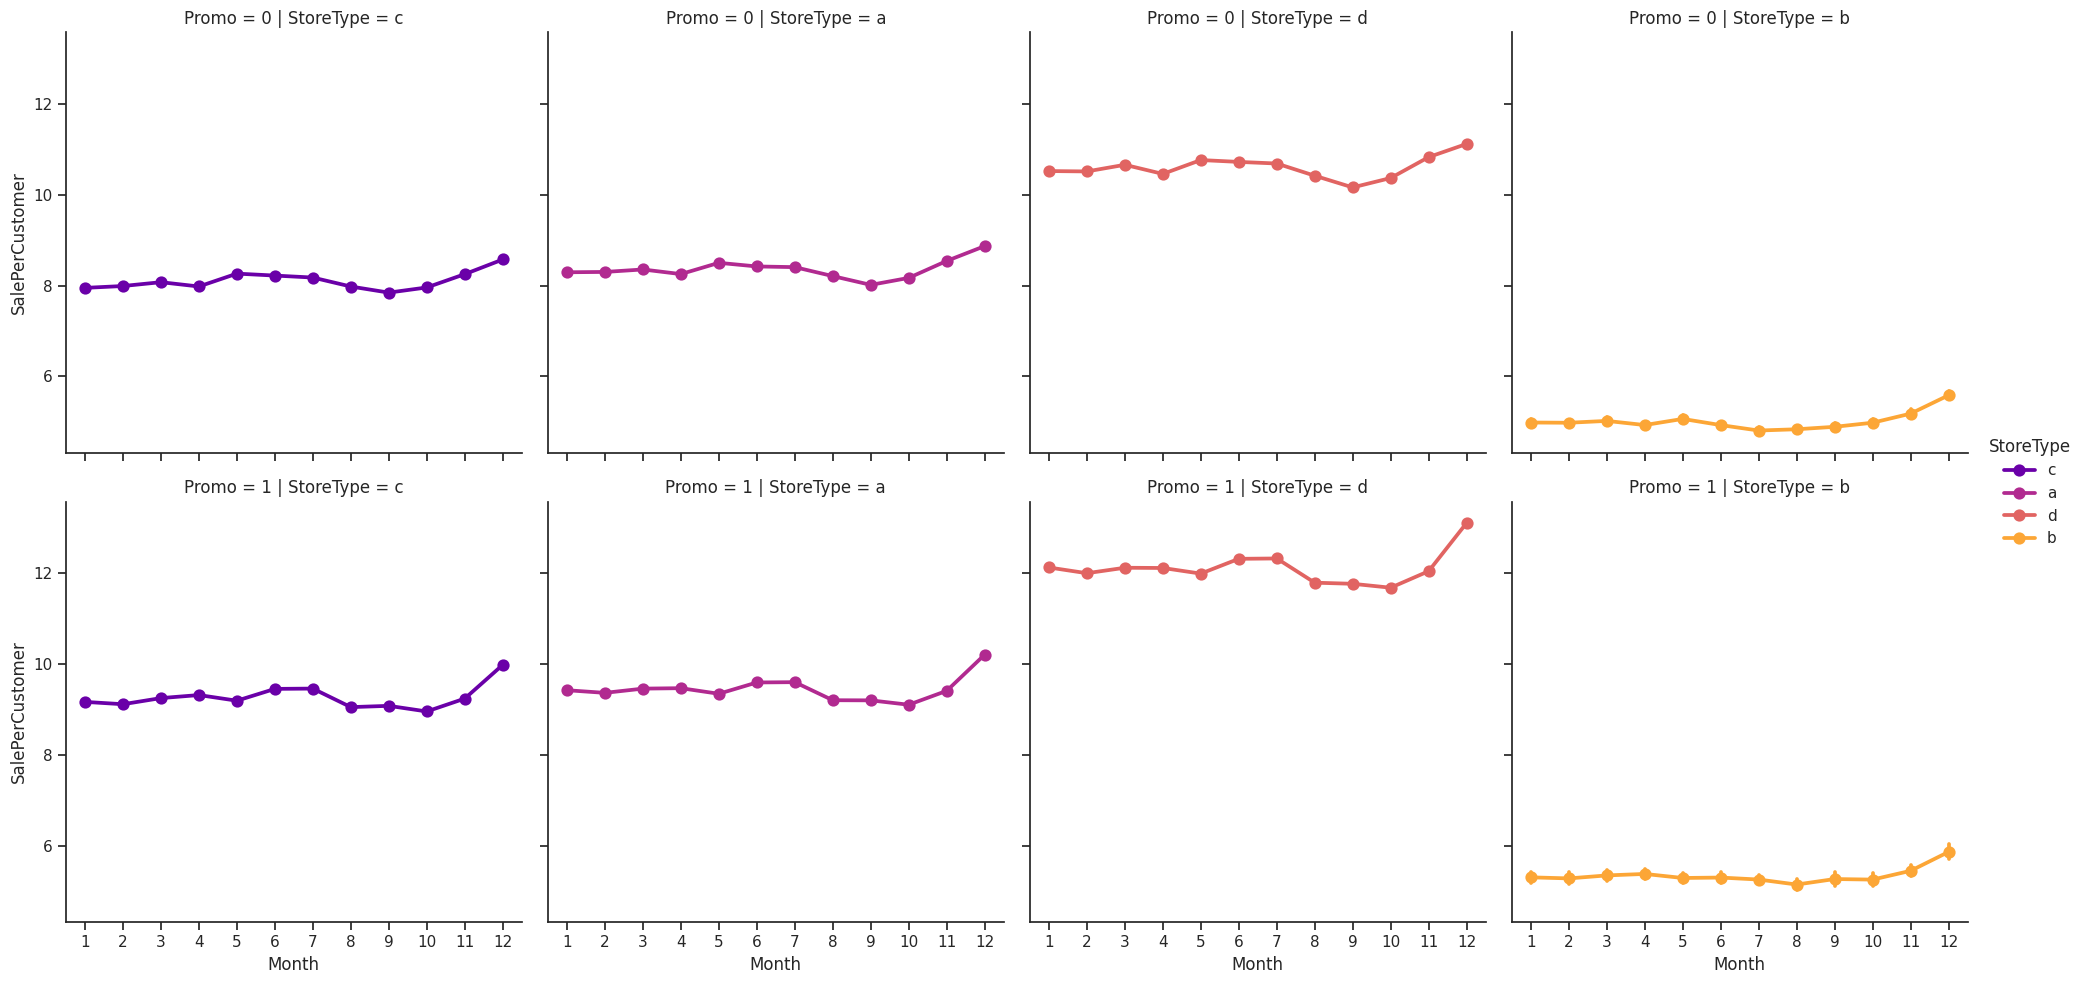

In [189]:
# 가게 유형별 고객 당 매출액 월별 추이
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               kind='point',
               color = c);

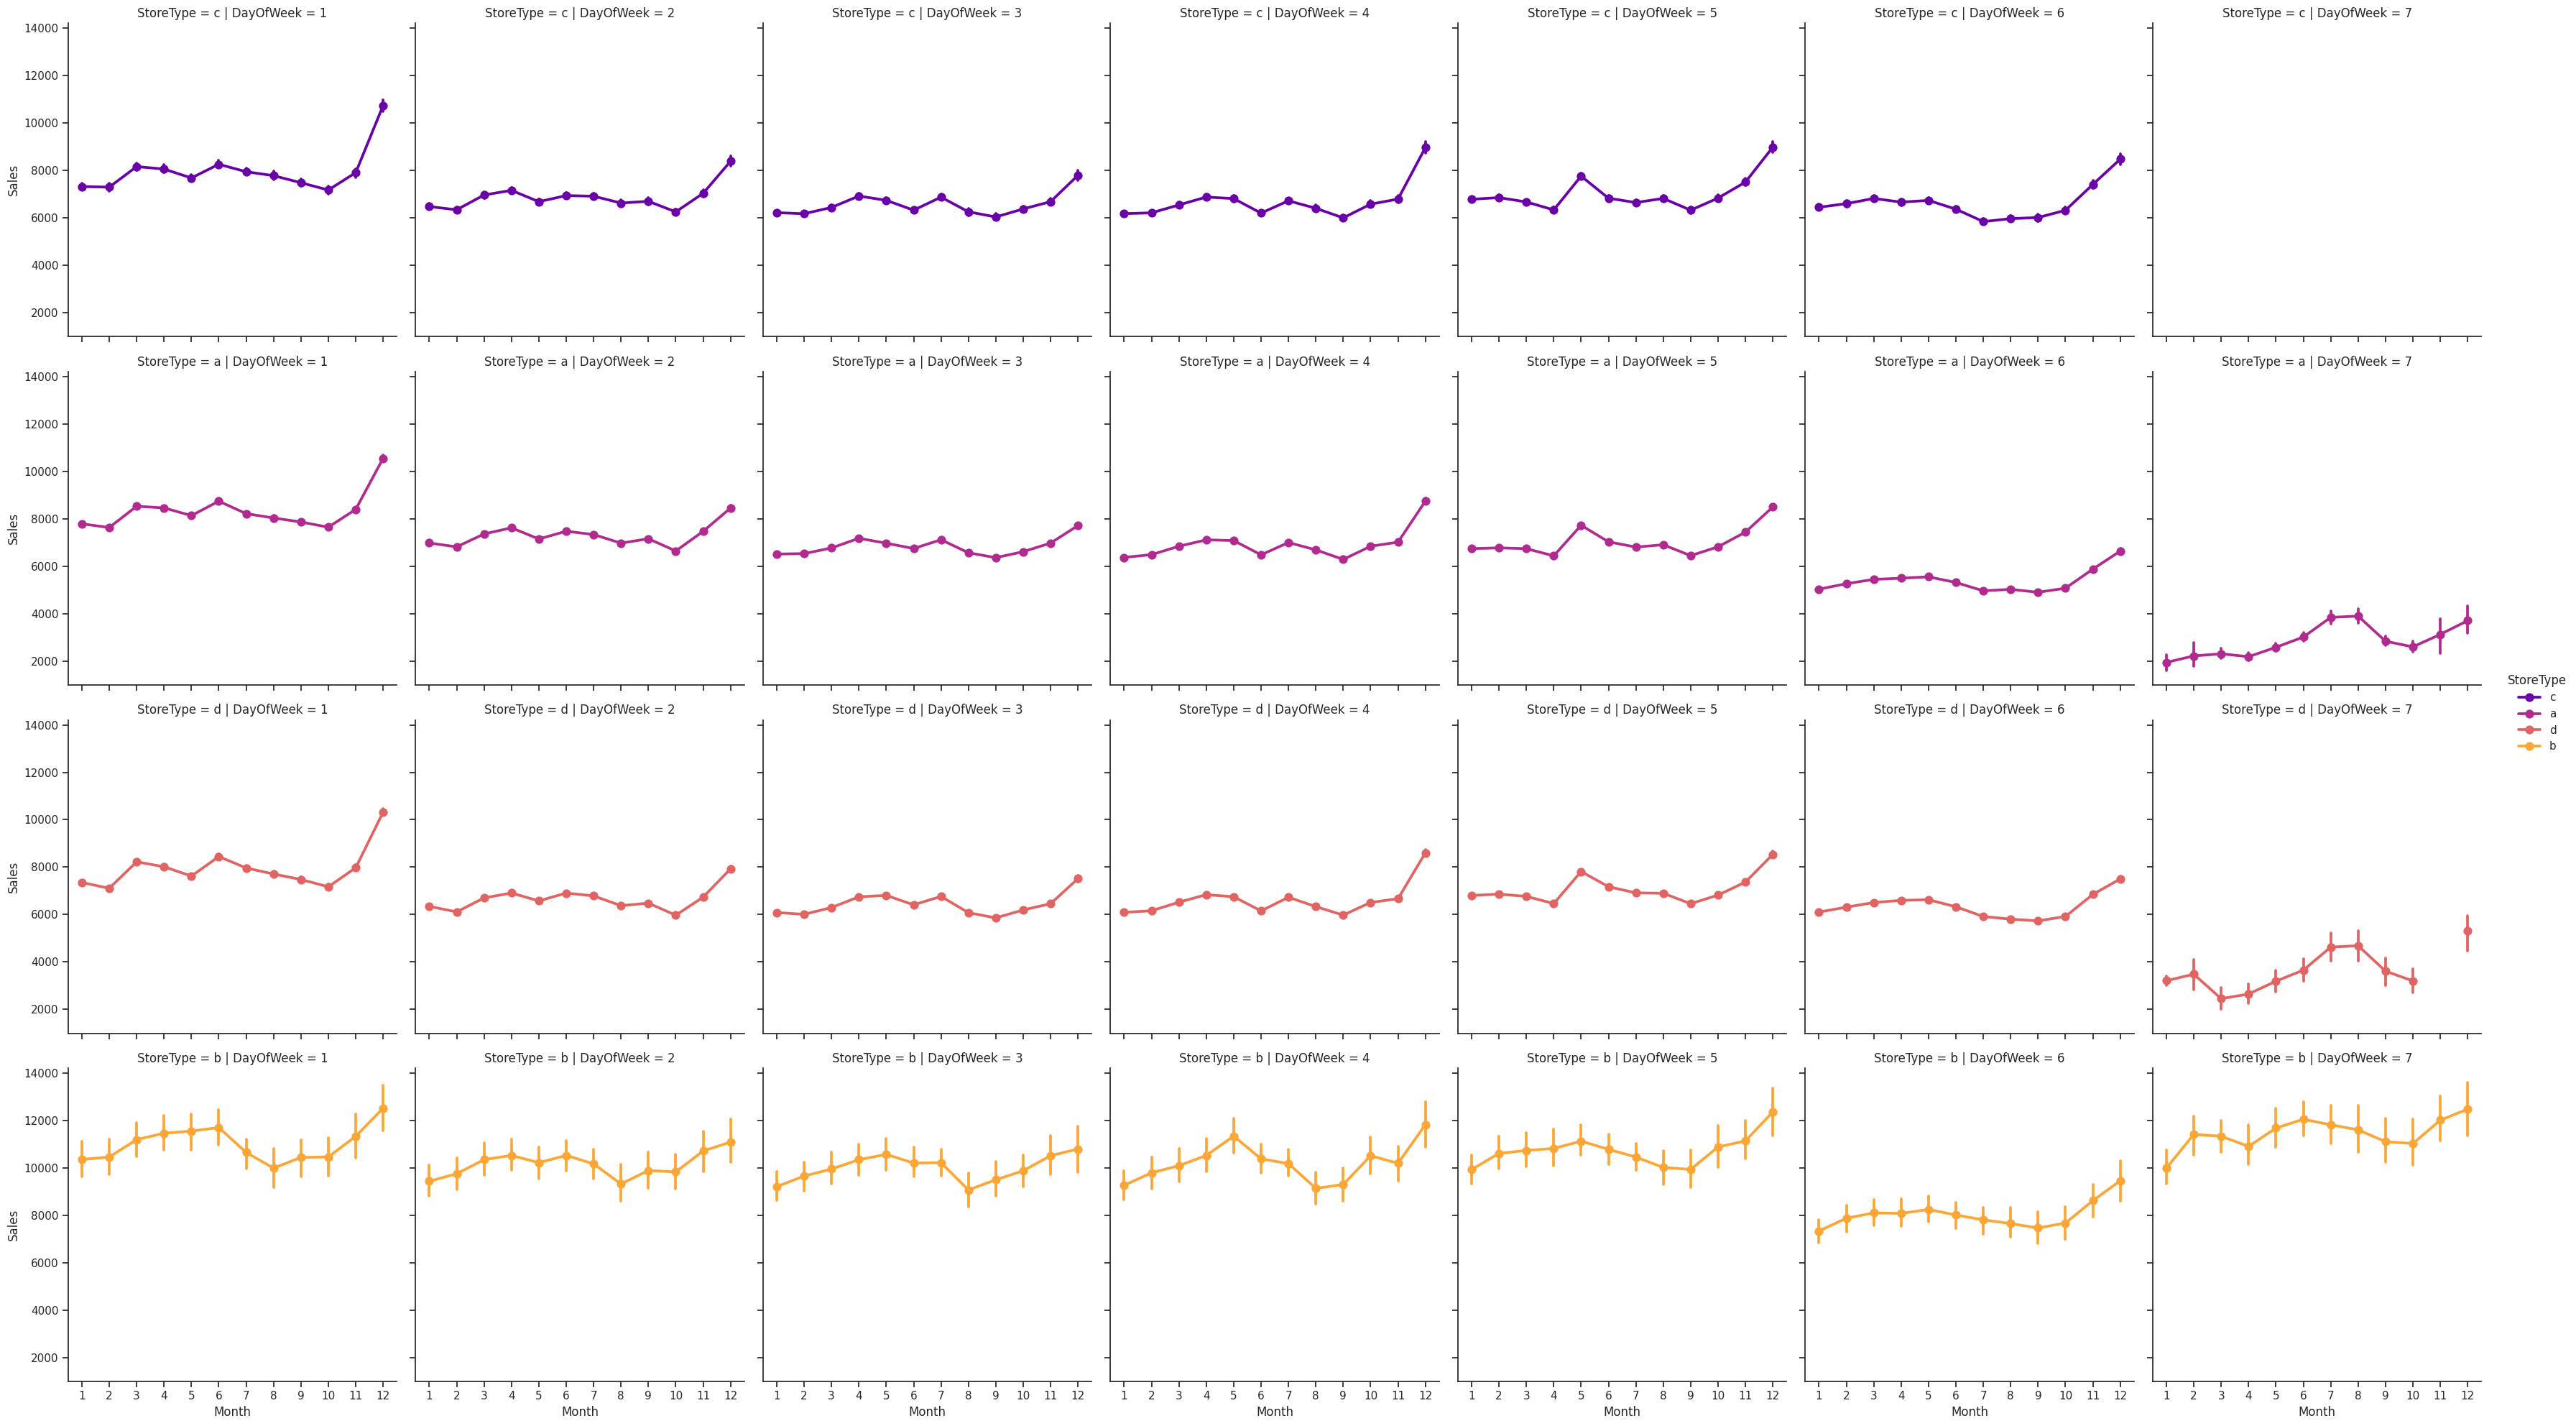

In [190]:
# 가게 유형별 매출액 주별 추이
sns.catplot(data = train_store, x = 'Month', y = "Sales",
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               kind='point',
               color = c);

In [191]:
# 일요일에 문을 여는 가게들
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

In [192]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

train_store.fillna(0, inplace = True)

train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


# 상관성

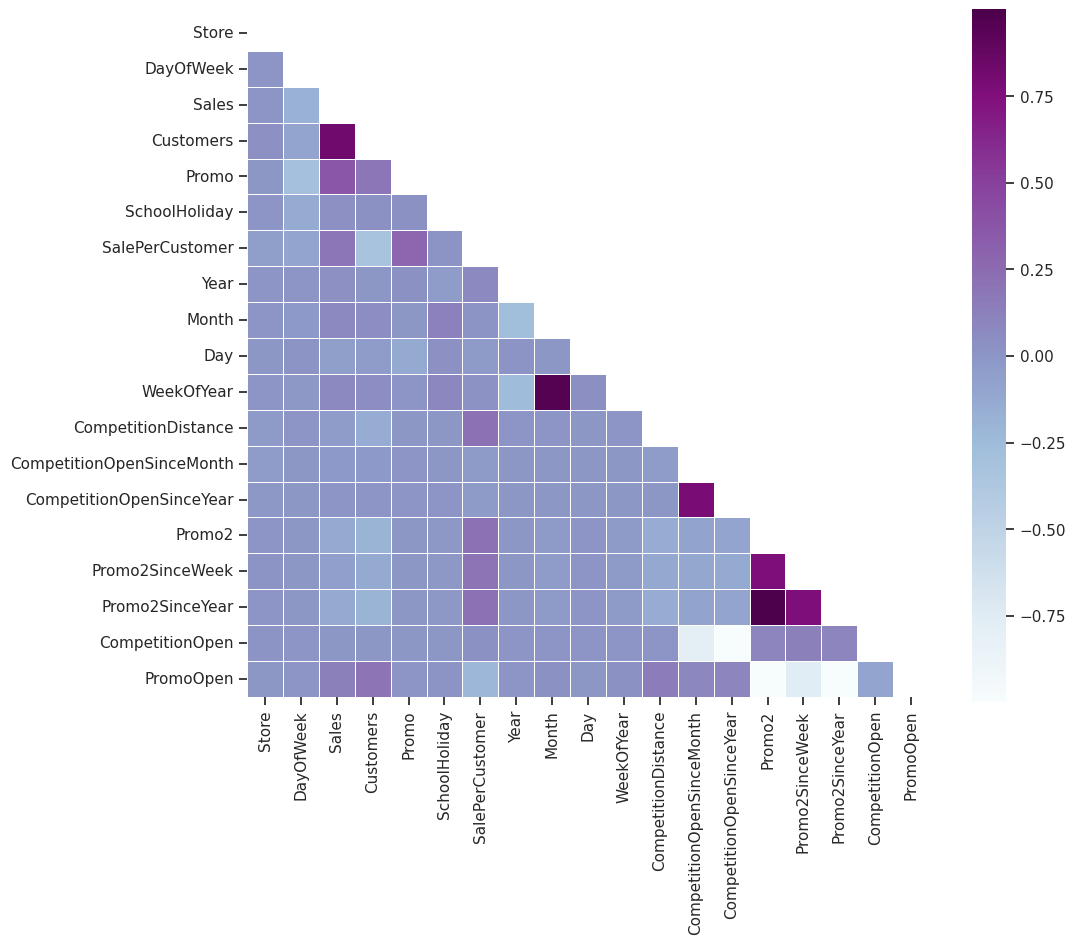

In [193]:
corr_all = train_store.drop('Open', axis = 1).corr()

mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")

plt.show()

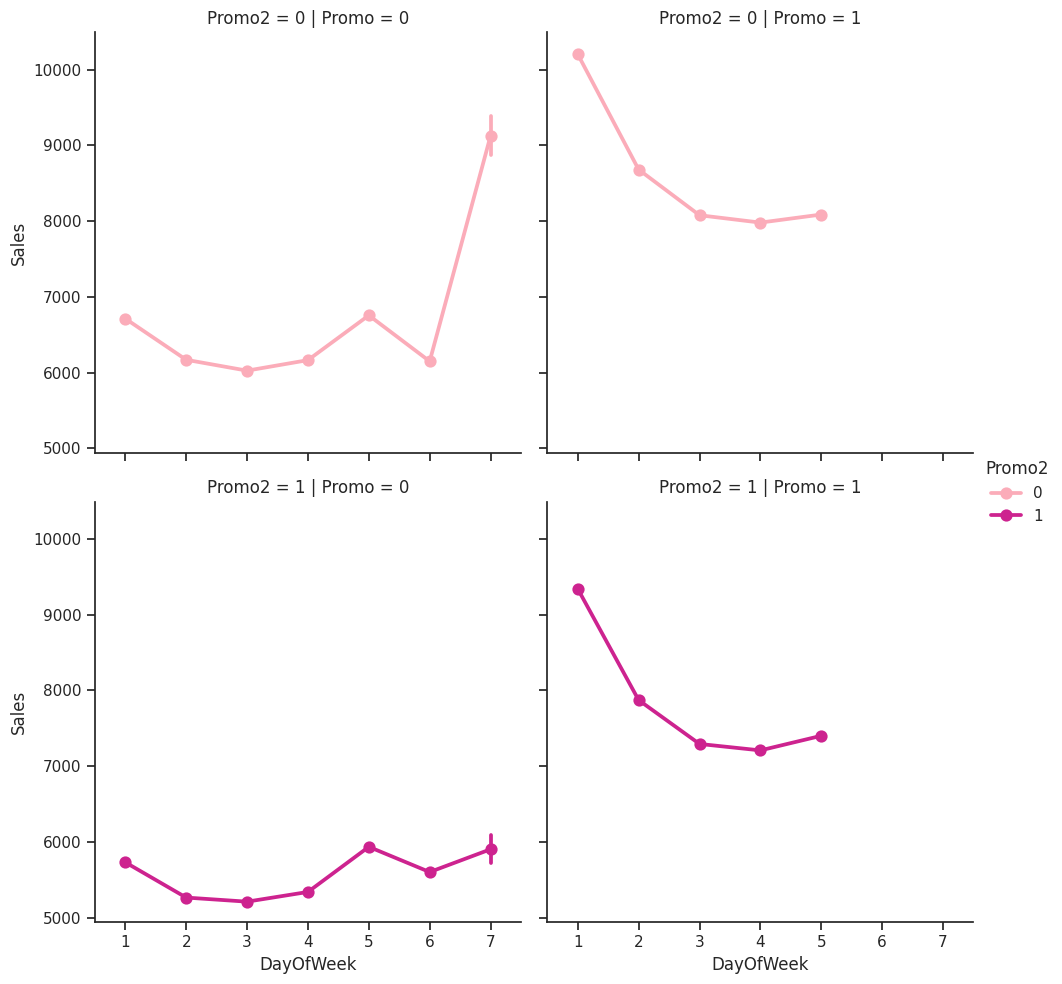

In [194]:
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales",
               col = 'Promo',
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu',
               kind='point');
# 프로모션 2는 효과가 없다

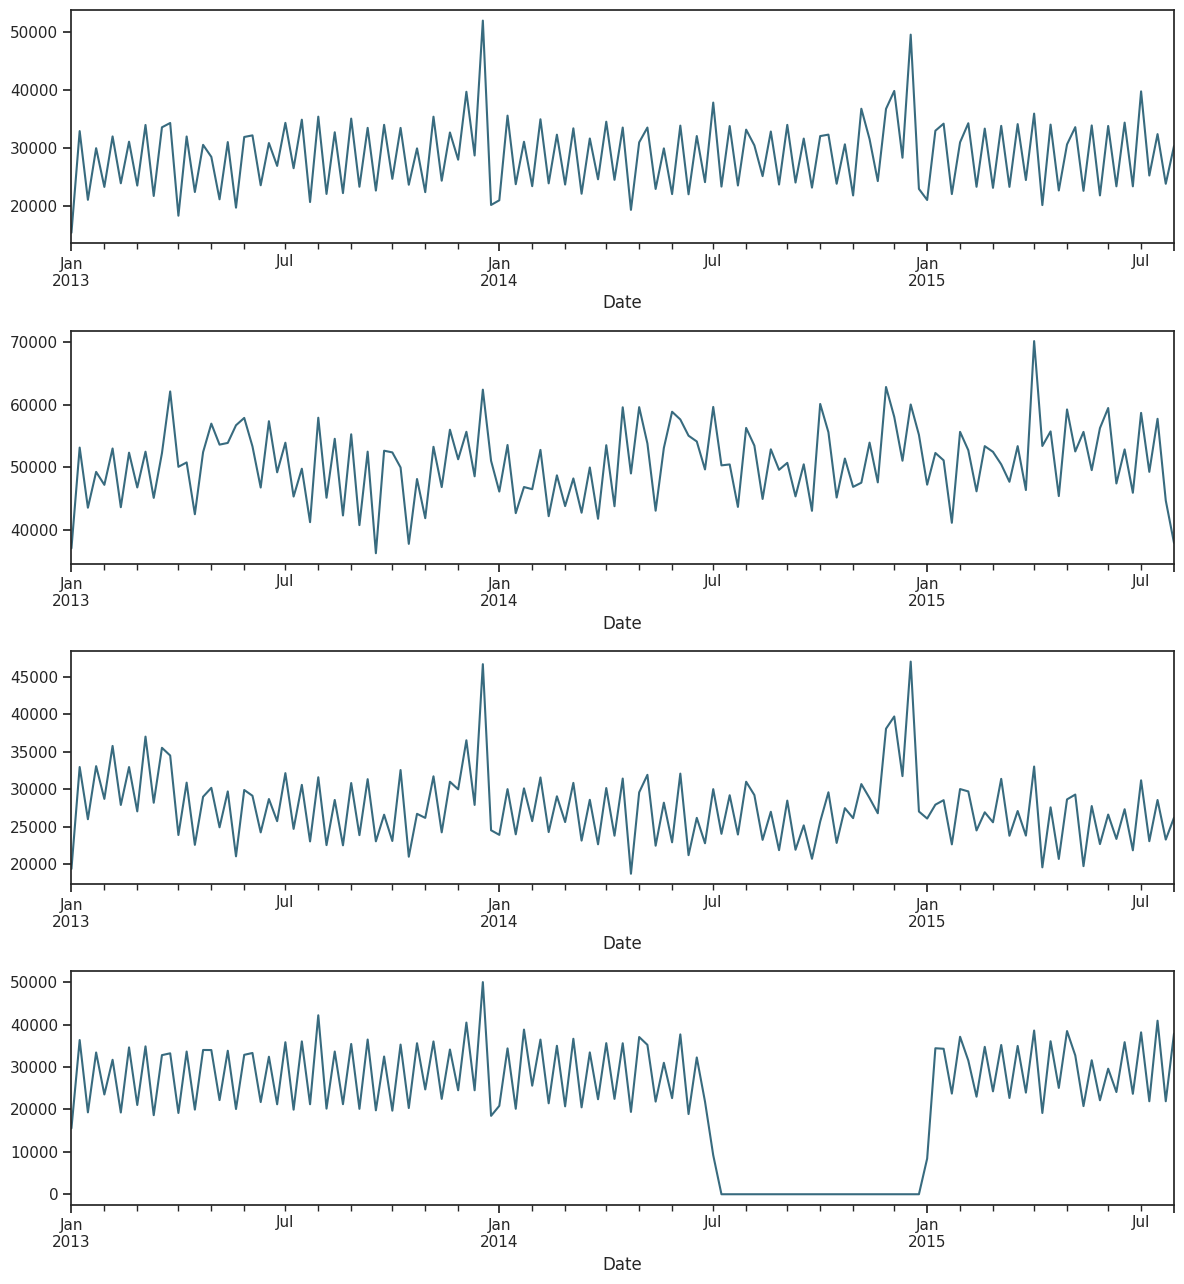

In [200]:
df['Sales'] = df['Sales'] * 1.0

sales_a = df[df.Store == 2]['Sales']
sales_b = df[df.Store == 85]['Sales'].sort_index(ascending = True)
sales_c = df[df.Store == 1]['Sales']
sales_d = df[df.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(color = c, ax = ax1) # W : 주간 , M : 월별
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)
plt.tight_layout()
plt.show()

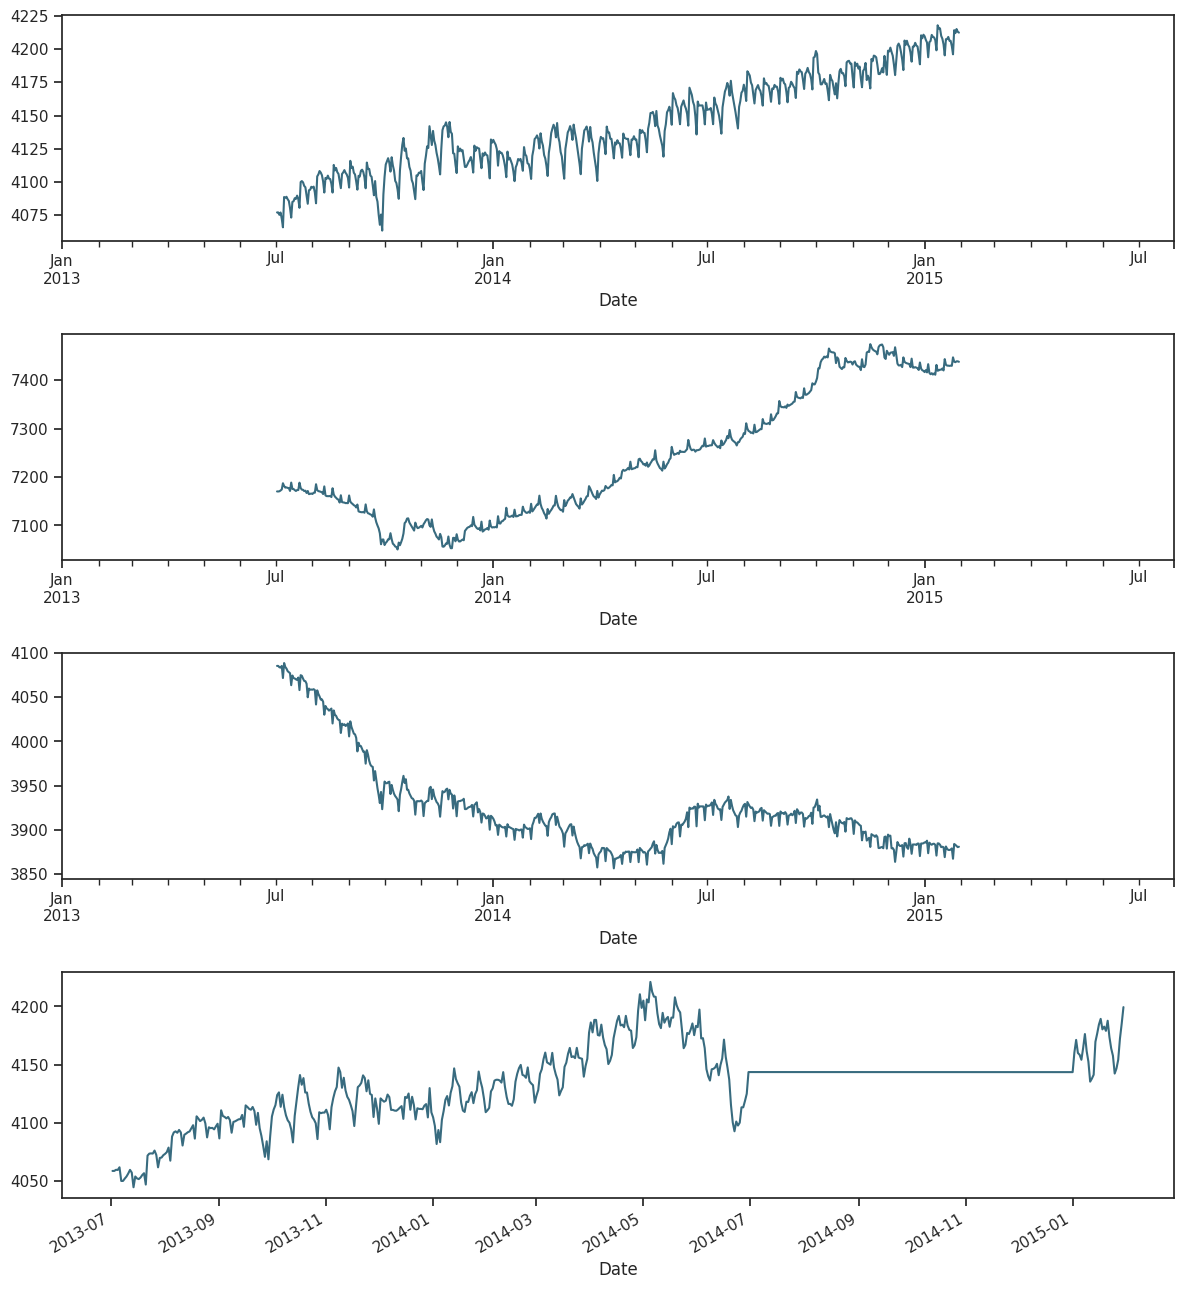

In [199]:
# 추세
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 365)
decomposition_d.trend.plot(color = c, ax = ax4)
plt.tight_layout()
plt.show()

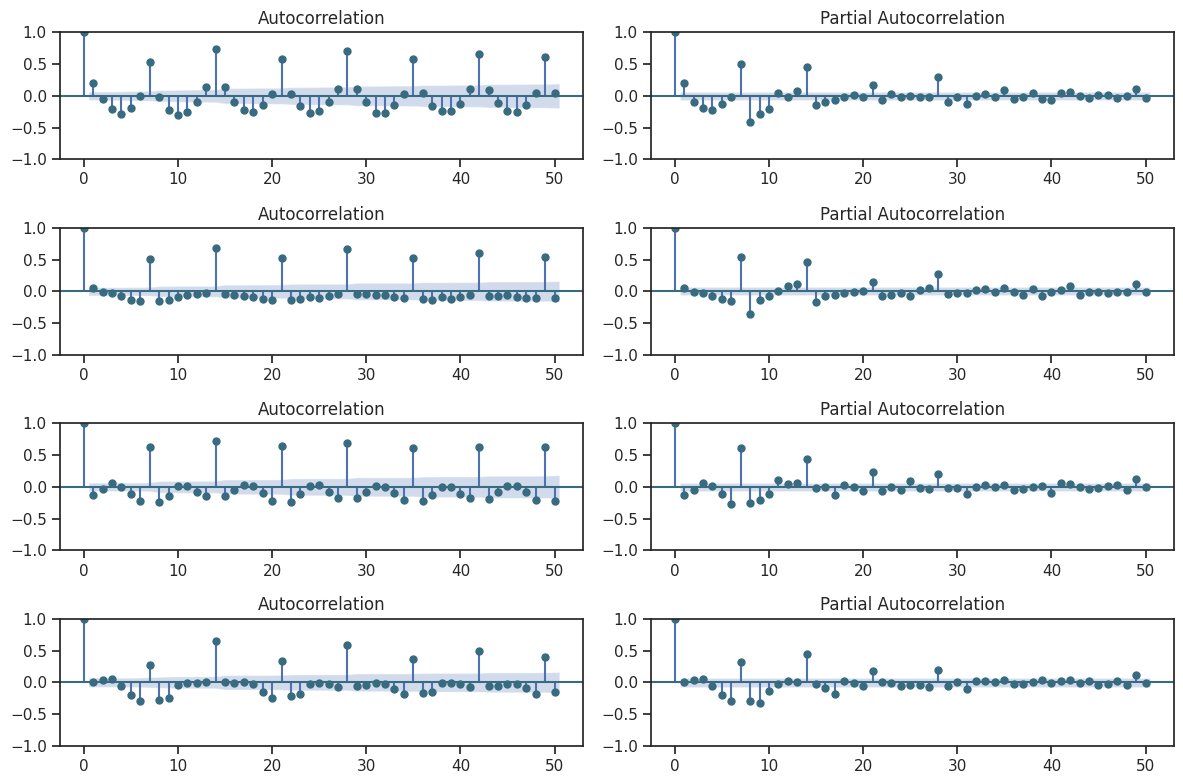

In [202]:
# 자기상관 기반 매출액 추세
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

plt.tight_layout()
plt.show()

In [203]:
# Prophet 을 활용한 매출 예측
df = pd.read_csv("2.train.csv", low_memory = False)

df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [204]:
# Prophet 에서는 모든 컬럼이 이름을 가져야 한다
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


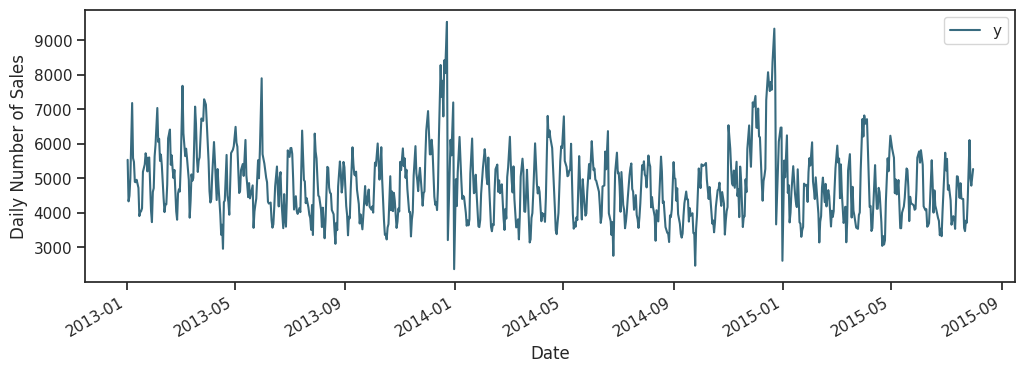

In [205]:
# 일일 매출 그래프
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [206]:
# 공휴일
# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [208]:
# 모델링
# Interval width : 95% (기본값 : 80%)
from prophet import Prophet

my_model = Prophet(interval_width = 0.95,
                   holidays = holidays)
my_model.fit(sales)

# 6주 간의 미래 데이터를 만든다
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("첫번째 주 예측 : ")
future_dates.tail(7)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1u66rgck/qe4yerei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1u66rgck/o7d660wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18411', 'data', 'file=/tmp/tmp1u66rgck/qe4yerei.json', 'init=/tmp/tmp1u66rgck/o7d660wl.json', 'output', 'file=/tmp/tmp1u66rgck/prophet_model_y9498zn/prophet_model-20240119055118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


첫번째 주 예측 : 


,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [209]:
forecast = my_model.predict(future_dates)

# 마지막 주 예측
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,4092.606361,2457.037622,5719.592746
817,2015-09-06,4087.406394,2540.903771,5674.159982
818,2015-09-07,4162.122862,2605.922906,5826.951485
819,2015-09-08,3664.551205,2095.225096,5243.405552
820,2015-09-09,3551.371794,1996.365909,5118.753552
821,2015-09-10,3462.862352,1671.288315,5121.139845
822,2015-09-11,3717.512457,2121.903099,5166.570900


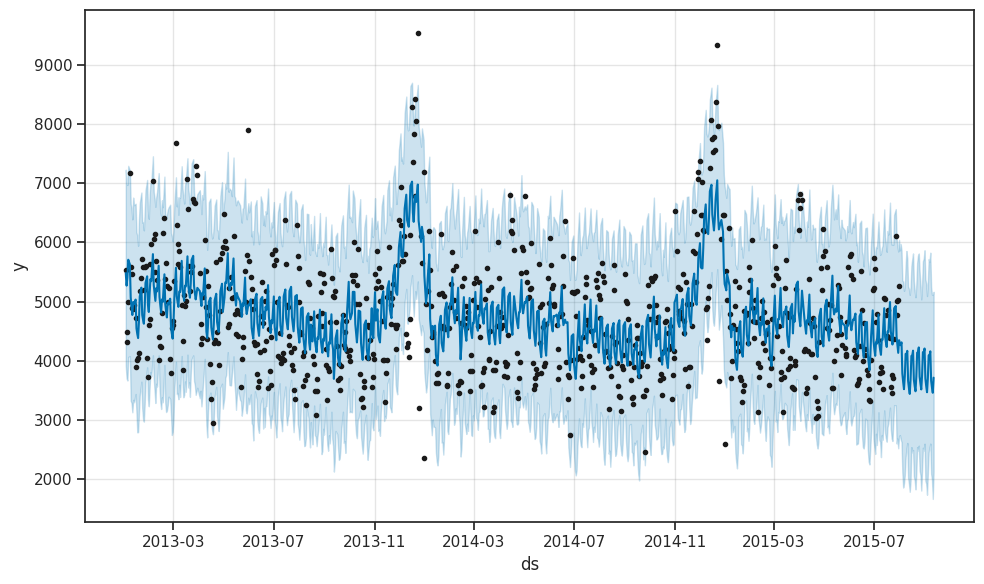

In [210]:
my_model.plot(forecast); # 파란색 예측 데이터, 검은색 실제 데이터

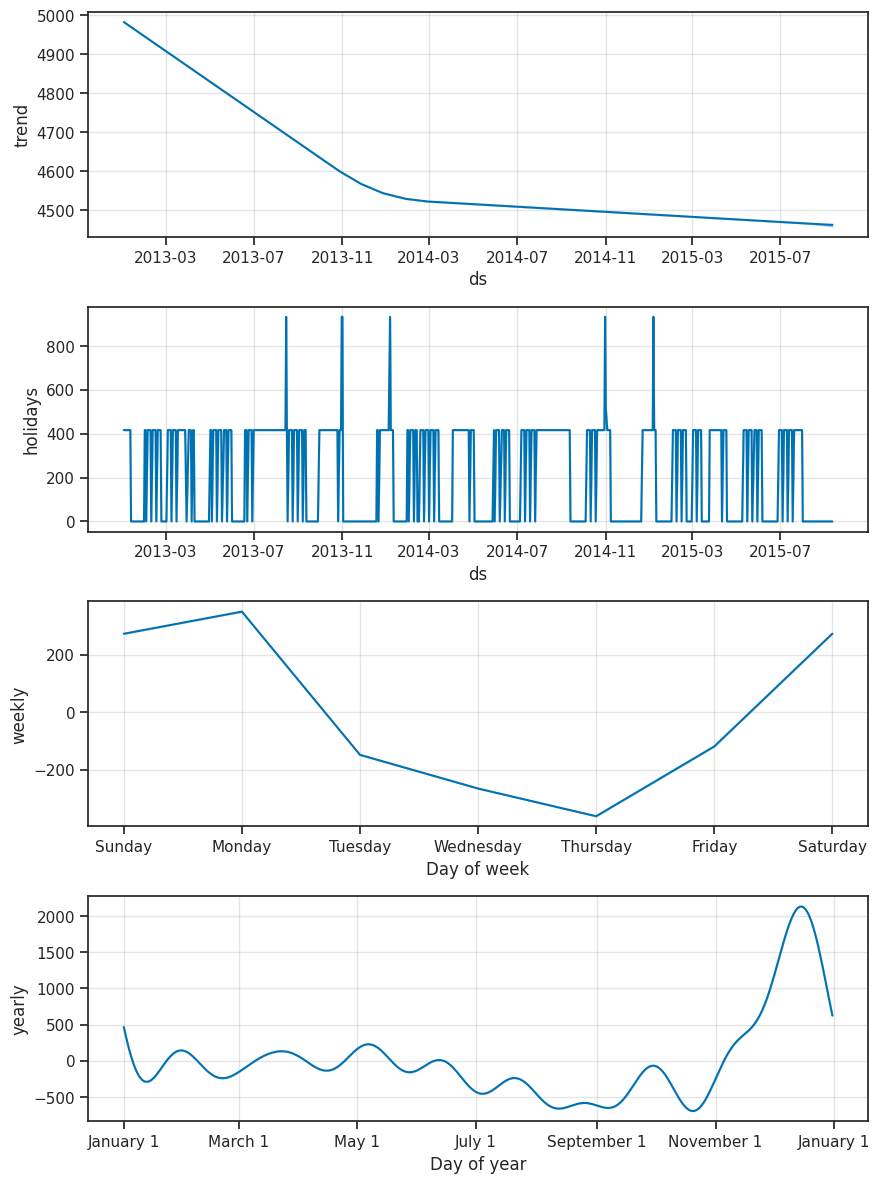

In [211]:
my_model.plot_components(forecast);